# Project house prediction:

## Initialization

In [1]:
import pandas as pd
import numpy as np

In [2]:
housedf = pd.read_csv("data.csv")

In [3]:
housedf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housedf.shape

(506, 14)

In [6]:
housedf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [7]:
housedf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
housedf['CHAS']

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS, Length: 506, dtype: int64

In [9]:
housedf['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

* below code line means i want to see my graphs here

In [10]:
# %matplotlib inline

In [11]:
# import matplotlib.pyplot as plt
# housedf.hist(bins=50 , figsize=(30,30))

## Splitting Data

In [12]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
      #with the above line we will have same split on every run and it will overcome the below problem 
#     shuffle = np.random.permutation(len(data))
#     permutation will give different shuffle on every run, in long run the model will se all the data
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffle[:test_set_size]
#     train_indices = shuffle[test_set_size:]

#     return data.iloc[train_indices] , data.iloc[test_indices]

# TEST:

# data = pd.DataFrame({
#     'A': np.random.rand(100),
#     'B': np.random.rand(100)
# })

# # Split the data
# train_set, test_set = split_train_test(data, 0.2)

# # Print the results
# print("Train set:")
# print(train_set.head())
# print("\nTest set:")
# print(test_set.head())

#### We can also use the in build function

In [13]:
from sklearn.model_selection import train_test_split
# as we want same split on every run so RS=0
train_set, test_set = train_test_split(housedf, test_size=0.2, random_state=0)

In [14]:
print(f"rows in train set: {len(train_set)}")
print(train_set)

print("==================================================================")
print(f"rows in test set: {len(test_set)}")
print(test_set)


rows in train set: 404
         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
220   0.35809   0.0   6.20     1  0.507  6.951  88.5  2.8617    8  307   
71    0.15876   0.0  10.81     0  0.413  5.961  17.5  5.2873    4  305   
240   0.11329  30.0   4.93     0  0.428  6.897  54.3  6.3361    6  300   
6     0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311   
417  25.94060   0.0  18.10     0  0.679  5.304  89.1  1.6475   24  666   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
323   0.28392   0.0   7.38     0  0.493  5.708  74.3  4.7211    5  287   
192   0.08664  45.0   3.44     0  0.437  7.178  26.3  6.4798    5  398   
117   0.15098   0.0  10.01     0  0.547  6.021  82.6  2.7474    6  432   
47    0.22927   0.0   6.91     0  0.448  6.030  85.5  5.6894    3  233   
172   0.13914   0.0   4.05     0  0.510  5.572  88.5  2.5961    5  296   

     PTRATIO       B  LSTAT  MEDV  
220     17.4  391.70   9.71  26.7  
71      19.2  37

### Stratified Learning
* by doing splitting like this, all the 1's or all the 0's could go to either train or test, then the model wont know that i can be 0 or 1, so to overcome this and have an equal split we use stratified learning:
* CHAS in this case is an important feature so we don't wat tat so we will do stratified shuffle on CHAS bases.

In [15]:
# from sklearn.model_selection import StratifiedShuffleSplit
# strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
    
# for train_index, test_index in strat_split.split(housedf, housedf['CHAS']):
#     train_set = housedf.iloc[train_index]
#     test_set = housedf.iloc[test_index]

* above function is the hardcoded function of the below builtin function for stratified split

In [16]:
train_set_stra, test_set_stra = train_test_split(housedf, test_size=0.2, random_state=0, stratify=housedf['CHAS'])

In [17]:
train_set_stra['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [18]:
test_set_stra['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

#### This is where we need to take copy of our test data and do everything done below till "MISSING ATTRIBUTES cell 21"

In [19]:
housedf = train_set_stra.copy()

## Correlation

* 1 strong , -1 inverse strong
* here we will check how the Price of house MEDV is relation to other features
* With this we can clean our data from the outliers which will result in a better model

In [20]:
cor_matrix = housedf.corr()
cor_matrix['MEDV'].sort_values(ascending=False)#default is ascending

MEDV       1.000000
RM         0.723664
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
LSTAT     -0.739293
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

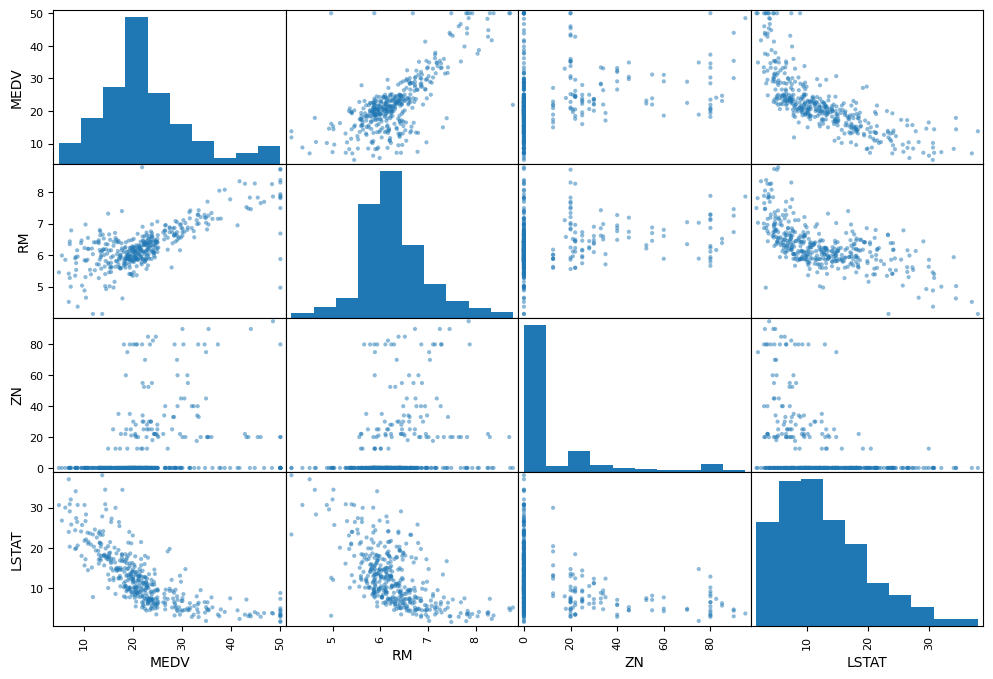

In [21]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housedf[attributes], figsize = (12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

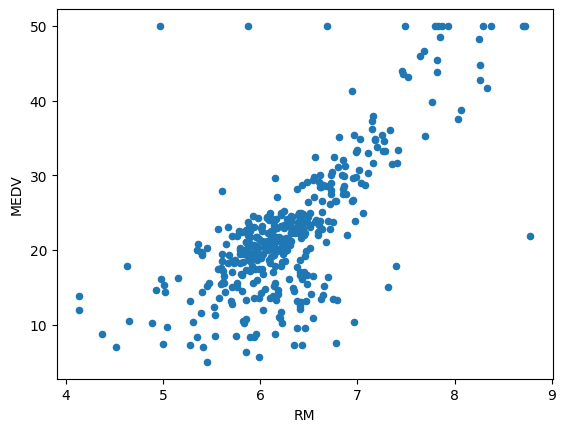

In [22]:
housedf.plot(kind="scatter" , x = "RM" , y = "MEDV" , alpha = 1)

* Above can be seen that there are outliers as 5 rooms house is also of 50 and 9 room house is also of 50, there is a problem with the data so we will clean this data

## Trying attribute combinations

In [23]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 64 to 493
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [24]:
housedf["TAXRM"] = housedf["TAX"] / housedf["RM"] #tax per room

In [25]:
housedf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0,30.405405
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6,51.823093
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2,107.022336
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4,106.919249
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6,44.627585


* checking the new correlation

In [26]:
cor_matrix = housedf.corr()
cor_matrix['MEDV'].sort_values(ascending=False)#default is ascending

MEDV       1.000000
RM         0.723664
B          0.326640
ZN         0.295445
DIS        0.229198
CHAS       0.163718
AGE       -0.347770
RAD       -0.393081
CRIM      -0.395603
NOX       -0.415604
INDUS     -0.458890
TAX       -0.481014
PTRATIO   -0.505297
TAXRM     -0.567833
LSTAT     -0.739293
Name: MEDV, dtype: float64

* can be seen that there is a negative strong correlation between MEDV and TAXRM

<Axes: xlabel='TAXRM', ylabel='MEDV'>

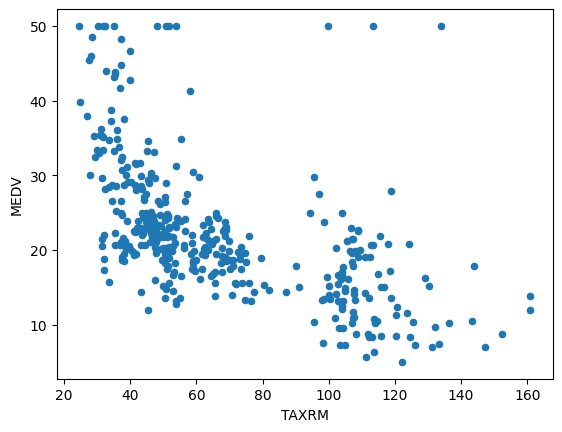

In [27]:
housedf.plot(kind="scatter" , x = "TAXRM" , y = "MEDV" , alpha = 1)

## Missing Attributes


* till here i was using hdata.csv and it didn't had any missing value
* but now i will use data.csv which has some missing values in RM feature so we know how to handle missing values
* we can handle them by three approaches:
    1. removing that whole row, or we can remove that feature from the dataset
    2. setting the value to zero, (mean or medius of that feature values) "Imputation"
    3. we can do imputation and also make another feature which will be true or false depending on whether the specific value of that feature is imputed or not (not in this project)

#### 1st option:


Removing the entries(rows) only

In [28]:
# by this we will know which column/feature has missing value
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 64 to 493
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [29]:
# it can be seen that RM has missing entries
# by this method we will remove all those rows where the RM value is missing

# housedf.dropna(subset=["RM"]) 
# by running the above line, the actual housedf will not change

# housedf.dropna(subset=["RM"], inplace=True) 
# this will change the housedf 

# but we wil make a copy for now, to avoid manipulation in actual housedf
filledRMdf = housedf.dropna(subset=["RM"]) 
filledRMdf.info()


<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 64 to 493
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     399 non-null    float64
 1   ZN       399 non-null    float64
 2   INDUS    399 non-null    float64
 3   CHAS     399 non-null    int64  
 4   NOX      399 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      399 non-null    float64
 7   DIS      399 non-null    float64
 8   RAD      399 non-null    int64  
 9   TAX      399 non-null    int64  
 10  PTRATIO  399 non-null    float64
 11  B        399 non-null    float64
 12  LSTAT    399 non-null    float64
 13  MEDV     399 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 49.9 KB


In [30]:
# all the rows where RM was Na, are dropped
filledRMdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.00000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000,399.000000
mean,3.733181,10.591479,11.111955,0.070175,0.553495,6.294301,68.553133,3.82527,9.528822,405.769424,18.493233,359.570376,12.597419,22.390226,66.076101
std,8.879138,21.867257,6.742437,0.255763,0.114848,0.695105,27.819797,2.11469,8.611582,166.779613,2.150092,86.314492,7.152582,9.146476,30.456853
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.12960,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.083175,0.000000,5.190000,0.000000,0.453000,5.884500,45.500000,2.09345,4.000000,281.000000,17.400000,375.955000,7.185000,17.050000,43.888815
50%,0.268380,0.000000,8.560000,0.000000,0.532000,6.208000,76.700000,3.27210,5.000000,330.000000,19.100000,391.250000,11.120000,21.100000,53.605727
75%,3.604340,12.500000,18.100000,0.000000,0.624000,6.617000,94.050000,5.21460,24.000000,666.000000,20.200000,396.175000,17.015000,25.000000,95.497633
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.12650,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


Removing/Dropping the whole Attribute with the missing values

In [31]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 64 to 493
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


In [32]:
# it can be seen that RM has missing entries
# by this method we will remove/drop the RM feature/attribute column

# housedf.drop("RM" , axis=1)
# by running the above line, the actual housedf will not change

# housedf.drop("RM" , axis=1, inplace = True)
# this will change the housedf 

# but we wil make a copy for now, to avoid manipulation in actual housedf
droppedRMdf = housedf.drop("RM" , axis=1)
droppedRMdf.info()
droppedRMdf.shape

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 64 to 493
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   AGE      404 non-null    float64
 6   DIS      404 non-null    float64
 7   RAD      404 non-null    int64  
 8   TAX      404 non-null    int64  
 9   PTRATIO  404 non-null    float64
 10  B        404 non-null    float64
 11  LSTAT    404 non-null    float64
 12  MEDV     404 non-null    float64
 13  TAXRM    399 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


(404, 14)

In [33]:
# It can be seen that the whole RM attribute column is dropped
droppedRMdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653,22.356683,66.076101
std,8.832484,21.762399,6.747763,0.254290,0.114465,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562,9.102181,30.456853
min,0.006320,0.000000,0.460000,0.000000,0.385000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.083437,0.000000,5.190000,0.000000,0.453000,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500,17.075000,43.888815
50%,0.258750,0.000000,8.560000,0.000000,0.532000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000,21.050000,53.605727
75%,3.489463,12.500000,18.100000,0.000000,0.624000,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500,25.000000,95.497633
max,88.976200,95.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


#### 2nd option

Using imputations(mean, median, zero)

In [34]:
median = housedf["RM"].median()
median

np.float64(6.208)

In [35]:
# original housedf is not change because inplace=True is not used
housedf["RM"].fillna(median)
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 64 to 493
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    399 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 50.5 KB


Using Imputer Class

In [36]:
housedf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.294301,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653,22.356683,66.076101
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.695105,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562,9.102181,30.456853
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.884500,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500,17.075000,43.888815
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000,21.050000,53.605727
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.617000,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500,25.000000,95.497633
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


In [37]:
from sklearn.impute import SimpleImputer
Model_imputer = SimpleImputer(strategy='median')
Model_imputer.fit(housedf)
# fitting it on housedf, it will output the medians of every attributes
Model_imputer.statistics_

array([2.58750000e-01, 0.00000000e+00, 8.56000000e+00, 0.00000000e+00,
       5.32000000e-01, 6.20800000e+00, 7.66000000e+01, 3.29860000e+00,
       5.00000000e+00, 3.30000000e+02, 1.91000000e+01, 3.91385000e+02,
       1.11700000e+01, 2.10500000e+01, 5.36057273e+01])

In [38]:
x = Model_imputer.transform(housedf)
x.shape

# this creates a numpy array, we will have to convert it in pandas DF

(404, 15)

In [39]:
# converting np array in pd DataFrame
housedf_imputer_trans = pd.DataFrame(x, columns=housedf.columns)
housedf_imputer_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  MEDV     404 non-null    float64
 14  TAXRM    404 non-null    float64
dtypes: float64(15)
memory usage: 47.5 KB


In [40]:
# we will check the transformed DF
housedf_imputer_trans.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.293233,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653,22.356683,65.921765
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.690846,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562,9.102181,30.298787
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.887250,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500,17.075000,44.094178
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000,21.050000,53.605727
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.608500,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500,25.000000,94.594556
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


In [41]:
# the actual DF with NA entries
housedf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.689672,10.553218,11.082698,0.069307,0.552945,6.294301,68.629703,3.835586,9.470297,404.675743,18.495297,360.000198,12.609653,22.356683,66.076101
std,8.832484,21.762399,6.747763,0.254290,0.114465,0.695105,27.744041,2.117322,8.576707,166.169489,2.148507,85.863735,7.125562,9.102181,30.456853
min,0.006320,0.000000,0.460000,0.000000,0.385000,4.138000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,24.645639
25%,0.083437,0.000000,5.190000,0.000000,0.453000,5.884500,45.550000,2.102700,4.000000,281.000000,17.400000,376.092500,7.197500,17.075000,43.888815
50%,0.258750,0.000000,8.560000,0.000000,0.532000,6.208000,76.600000,3.298600,5.000000,330.000000,19.100000,391.385000,11.170000,21.050000,53.605727
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.617000,94.100000,5.218725,24.000000,666.000000,20.200000,396.157500,16.992500,25.000000,95.497633
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,160.947318


##### till here we were manipulating the whole dataset, we should have only manipulated the train set, so now we will go back to "SPLITTING DATA cell 10" and start from there

## Feature Scaling

Primarily two types:
1. Normalization (Min max Scaling)
    * (value-min) / (max-min)
    * from sklearn.preprocessing import MinMaxScaler
    
2. Standardization
    * (value-mean) / std
    * from sklearn.preprocessing import StandardScaler

## Creating Pipelines

Automating the task: (all the imputation and feature scaling we did above wil be automated in one place)
* Applying feature scaling by standardization
* Imputing missing values with median

Reference to "Selecting the Model" 1st markdown cell:
* separating the features are target attribute

In [42]:
train_set_stra

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,4.75237,0.0,18.10,0,0.7130,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
59,0.10328,25.0,5.13,0,0.4530,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
417,25.94060,0.0,18.10,0,0.6790,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
140,0.29090,0.0,21.89,0,0.6240,6.174,93.6,1.6119,4,437,21.2,388.08,24.16,14.0


In [43]:
housedf = train_set_stra.drop("MEDV", axis=1)
target_label = train_set_stra["MEDV"].copy()
# we .copy() because we want it to be a copy in this any changes made 
# to target_label won't effect the MEDV column of train_set_stra

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipe_line = Pipeline([
    ("Pipeline_Imputer" , SimpleImputer(strategy="median")),
     # can include as many classes, function we want
    ("std_Scaling", StandardScaler())

# hierarchy of these pipelines is like the first one will fit_transform 
# and then the other will do the same and it will keep going 
# like this but the final one will do fit

])

the below code will give a numpy array, we will use fit_transform of our pipeline to apply it on the dataset

* just checking the housedf before standardization

In [45]:
housedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 64 to 493
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [46]:
# housedf is now the copy of our training set only, reference to splitting data
pipelined_housedf = pipe_line.fit_transform(housedf)
# pipelined_housedf

As the above output would be a numpy array, so i will change it to pandas DataFrame just for the comparison purpose with the actual housedf(train set)

In [47]:
housedf_pipeline_check = pd.DataFrame(pipelined_housedf, columns=housedf.columns)
housedf_pipeline_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    float64
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    float64
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


Above code was just for comparison purpose. We will be using the numpy array that was the output of our pipeline because "Predictors" work on numpy arrays

## Selecting the Model

Till here we were doing things with all the columns as we didn't separate the features and the target label. We have a choice here we can either separate the dataset which has the new combination feature(TAXRM) as well but it may harm the model so we will go with the test set that we got by "Splitting Data"

Reference to the 1st cell of "Creating Pipelines" as everything after "Splitting Data" to "Feature Scaling" is done in "Creating Pipelines"
 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Model 1
# ml_model = LinearRegression()

# Model 2
# ml_model = DecisionTreeRegressor(random_state=0)

#Model 3
ml_model = RandomForestRegressor(random_state=1)

# fitting the model
ml_model.fit(pipelined_housedf , target_label) # fit(features , target)


RandomForestRegressor(random_state=1)

#### CHECKING PURPOSE
* We will separate the features and target value in the test set and will take few entries for prediction purpose and after that we will compare and calculate MSE/RMSE

* Correction: We will use train set because we have to calculate MSE/RMSE and also check if the model is fitted fine (not over or under fitted)

* Train data will only be used once the desired fitted model is selected 

In [49]:
train_set_stra

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
24,0.75026,0.0,8.14,0,0.5380,5.924,94.1,4.3996,4,307,21.0,394.33,16.30,15.6
379,17.86670,0.0,18.10,0,0.6710,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
479,14.33370,0.0,18.10,0,0.6140,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
325,0.19186,0.0,7.38,0,0.4930,6.431,14.7,5.4159,5,287,19.6,393.68,5.08,24.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,4.75237,0.0,18.10,0,0.7130,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1
59,0.10328,25.0,5.13,0,0.4530,5.927,47.2,6.9320,8,284,19.7,396.90,9.22,19.6
417,25.94060,0.0,18.10,0,0.6790,5.304,89.1,1.6475,24,666,20.2,127.36,26.64,10.4
140,0.29090,0.0,21.89,0,0.6240,6.174,93.6,1.6119,4,437,21.2,388.08,24.16,14.0


In [50]:
housedf_test = train_set_stra.drop("MEDV", axis=1)
target_label_test = train_set_stra["MEDV"].copy()
data_features = housedf_test.iloc[:5]
# data_features.info()

In [51]:
actual_target = target_label_test.iloc[:5]
# actual_target.info()

In [52]:
prepared_data = pipe_line.fit_transform(data_features)
# prepared_data.shape

In [53]:
# ml_model is fitted in the above cells with the train data already
predicted_target = ml_model.predict(prepared_data)
predicted_target

array([42.612, 18.401, 10.114, 19.26 , 26.287])

In [54]:
list(actual_target)

[33.0, 15.6, 10.2, 21.4, 24.6]

looks like there is error between actual and predicted values

## Evaluating the Error

In [55]:
from sklearn.metrics import mean_squared_error

calculated_RMSE = mean_squared_error(actual_target , predicted_target) # (actual , predicted)
underRoot_calculated_RMSE = np.sqrt(calculated_RMSE)
print(f"The MSE = {calculated_RMSE}\nThe RMSE = {underRoot_calculated_RMSE}")

The MSE = 21.533822000000036
The RMSE = 4.64045493459424


Now MSE is high which is not a good thing. So, now we will use another Model 2 or 3. Reference to "Selecting the Model" code cell 1

It can be seen that by using model 2 our MSE got worse, but in some cases we can have 0 MSE, which means that our model has OverFitted and captured the noises in the training set

## Cross Validation

### For Better Evaluation

In [56]:
from sklearn.model_selection import cross_val_score

CrossValidation_scores = (-1) * cross_val_score(ml_model , pipelined_housedf , target_label , scoring="neg_mean_squared_error" , cv=10)
CrossValidation_scores_RMSE = np.sqrt(CrossValidation_scores)
print(f"Cross Validation MSE Scores: {CrossValidation_scores}\nCross Validation RMSE Scores: {CrossValidation_scores_RMSE}")

Cross Validation MSE Scores: [11.50804578 20.09149193  7.99378937 11.35355305  9.08940943  4.9716118
  9.99559092 14.75358775 19.07873075 10.48795068]
Cross Validation RMSE Scores: [3.39235107 4.48235339 2.82732902 3.36950338 3.01486474 2.22971115
 3.16158045 3.84103993 4.36792064 3.23851056]


In [57]:
def score_evaluating(finalScores):
    # these pre defined functions works only over numpy arrays
    print("CV RMSE Scores: " , finalScores)
    print("Mean: " , finalScores.mean())
    print("Standard deviation: " , finalScores.std())

In [58]:
score_evaluating(CrossValidation_scores_RMSE)

CV RMSE Scores:  [3.39235107 4.48235339 2.82732902 3.36950338 3.01486474 2.22971115
 3.16158045 3.84103993 4.36792064 3.23851056]
Mean:  3.3925164338069136
Standard deviation:  0.6505446879693528


In the scores.txt file it can be seen that Model 3 has the best CV mean, so we will use it for our prediction over the test data

## Saving the Model

In [59]:
from joblib import dump
dump(ml_model , 'Final_model.joblib')

['Final_model.joblib']

## Testing the Model on Test Set

#### Separating the feature and target attribute in the Test set.

In [64]:
housedf_testing = test_set_stra.drop("MEDV", axis=1)
target_label_testing = test_set_stra["MEDV"].copy() #Actual test target value

pipelined_housedf_testing = pipe_line.transform(housedf_testing)

# converting numpy array into pandas DataFrame just to check
test_check = pd.DataFrame(pipelined_housedf_testing, columns=housedf_testing.columns)
# test_check.info()


fit_transform:
* Purpose: fit_transform is used during the training phase.
* Function: It first learns the parameters from the training data (fit) and then applies the transformation to the data (transform).
* Use Case: You use fit_transform when you are training your pipeline or preprocessing steps on your training data.

transform
* Purpose: transform is used during the testing phase or when applying the pipeline to new, unseen data.
* Function: It only applies the transformation using the already learned parameters without re-fitting.
* Use Case: You use transform when you want to apply the same transformations learned from the training data to your testing or new data.

Why This Difference Matters:

Using fit_transform on your testing data would mean that you are learning new parameters from your testing data, which leads to data leakage and invalidates the model's evaluation. You want to ensure that your model and preprocessing steps are evaluated on unseen data to simulate real-world performance.

Summary
* fit_transform: Use on training data to learn parameters and transform data.
* transform: Use on testing or new data to apply the learned transformations without re-fitting.

#### Predicting the target Outputs

In [61]:
test_target_predictions = ml_model.predict(pipelined_housedf_testing) #Predicted test target value

#### Calculating the RMSE and RMS

In [65]:
test_predictions_MSE = mean_squared_error(target_label_testing , test_target_predictions) # (actual , predicted)
test_predictions_RMSE = np.sqrt(test_predictions_MSE)
print(f"The MSE = {test_predictions_MSE}\nThe RMSE = {test_predictions_RMSE}")

The MSE = 26.656416999999983
The RMSE = 5.1629852798550555


## Taking value for modelUsage.ipynb

Just taking any rows feature so i can take it as input in the modelUsage notebook

In [77]:
# this is a numpy array that is way we can do this direct method
pipelined_housedf_testing[65]

array([ 0.57274417, -0.5       ,  1.14354803,  0.        ,  1.35938851,
       -3.73240092,  0.91201686, -1.17674174,  1.22220127,  1.21012613,
        0.35176324,  1.25149461,  3.70144781])

In [78]:
# this is a pandas dataFrame that is why we have to use .iloc as we can not do the direct method
target_label_testing.iloc[65]

np.float64(13.8)